In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.cluster import KMeans

datos = pd.read_csv("datos.csv")
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<Axes: xlabel='latitude', ylabel='longitude'>

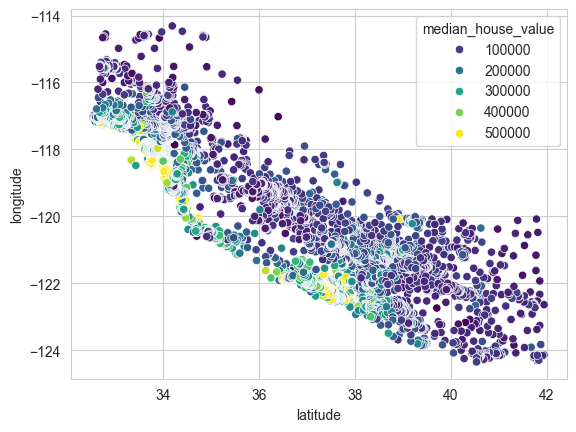

In [3]:
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_house_value", palette="viridis")

<Axes: xlabel='latitude', ylabel='longitude'>

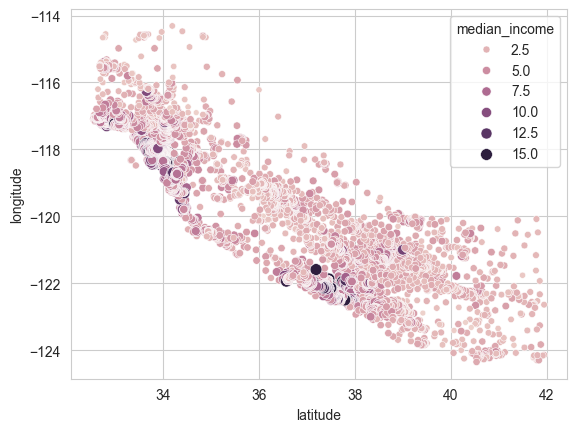

In [5]:
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_income", size=datos["median_income"])

In [7]:
x = datos.loc[:, ["latitude", "longitude","median_income"]]
x

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [9]:
from sklearn.cluster import KMeans
x = datos.loc[:, ["latitude", "longitude", "median_income"]]
modelo = KMeans(n_clusters=5)
predicciones = modelo.fit_predict(x)

In [14]:
x["Segmento_Economico"] = predicciones
x

,latitude,longitude,median_income,Segmento_Economico
0,37.88,-122.23,8.3252,2
1,37.86,-122.22,8.3014,2
2,37.85,-122.24,7.2574,2
3,37.85,-122.25,5.6431,2
4,37.85,-122.25,3.8462,1
...,...,...,...,...
20635,39.48,-121.09,1.5603,1
20636,39.49,-121.21,2.5568,1
20637,39.43,-121.22,1.7000,1
20638,39.43,-121.32,1.8672,1


<Axes: xlabel='latitude', ylabel='longitude'>

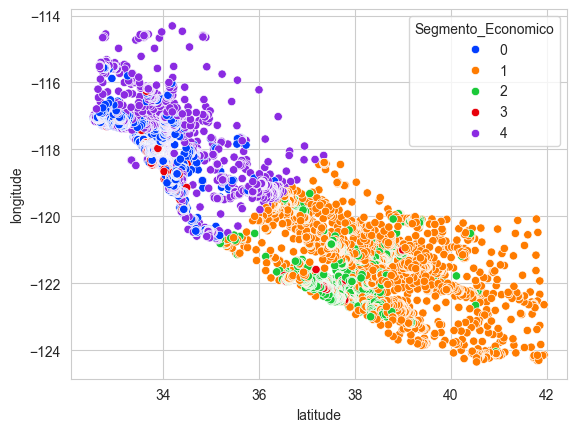

In [21]:

sb.scatterplot(x="latitude", y="longitude", data=x, hue="Segmento_Economico", palette="bright")

In [18]:
x["Segmento_Economico"].value_counts()

Segmento_Economico
4    7002
1    5523
0    4518
2    3012
3     585
Name: count, dtype: int64

<Axes: xlabel='Segmento_Economico', ylabel='count'>

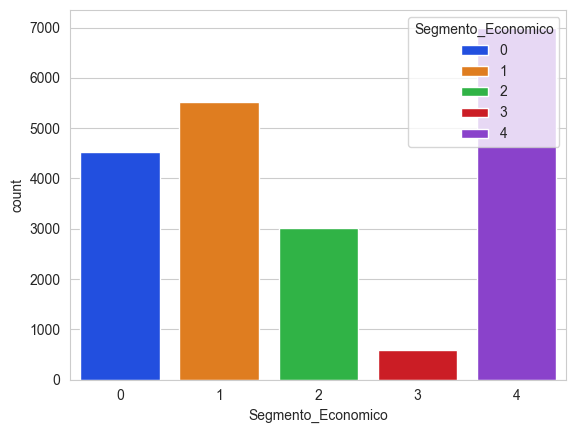

In [31]:
sb.countplot(x="Segmento_Economico",data=x, hue="Segmento_Economico", palette="bright")

In [37]:
x.groupby(["Segmento_Economico"])["median_income"].mean()*10000

Segmento_Economico
0     51917.111332
1     27379.854065
2     54158.320053
3    103448.711111
4     27061.367609
Name: median_income, dtype: float64